<a href="https://colab.research.google.com/github/charles-shaju/Charles-Shaju/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

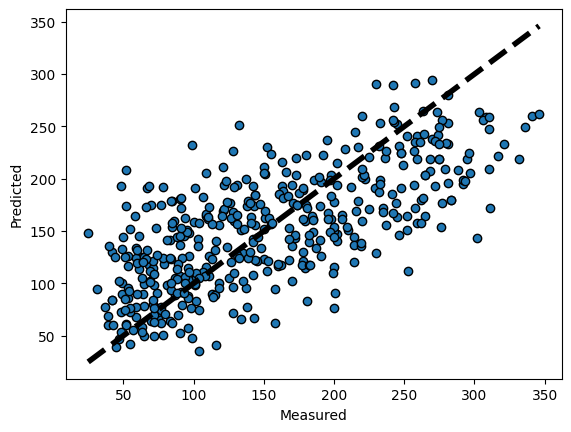

In [1]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
lr = linear_model.LinearRegression()
X, y = datasets.load_diabetes(return_X_y=True)
predicted = cross_val_predict(lr, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


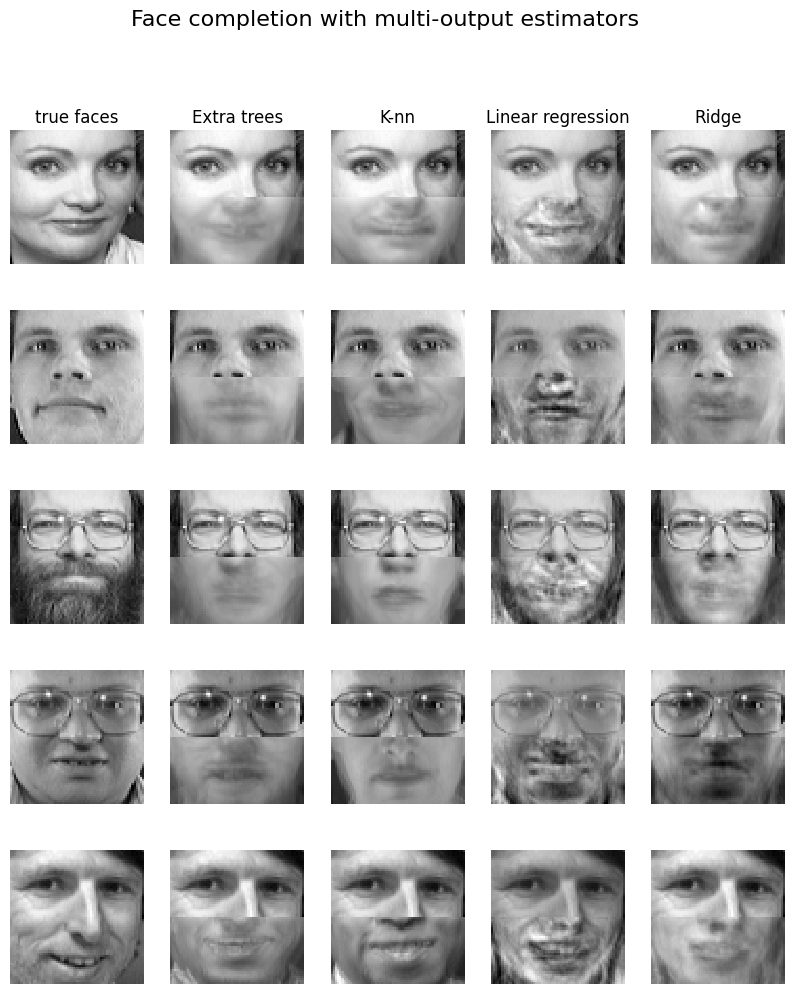

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

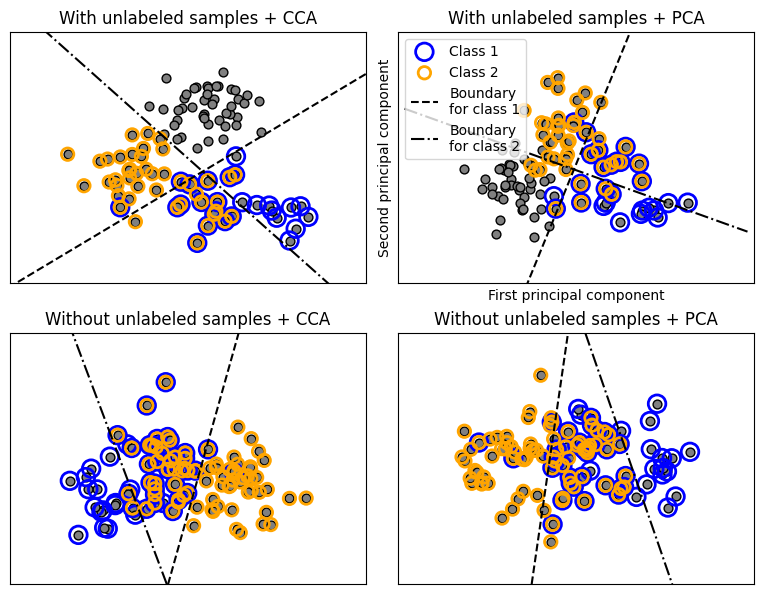

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
 # get the separating hyperplane
 w = clf.coef_[0]
 a = -w[0] / w[1]
 xx = np.linspace(min_x - 5, max_x + 5) # make sure the line is long enough
 yy = a * xx - (clf.intercept_[0]) / w[1]
 plt.plot(xx, yy, linestyle, label=label)
def plot_subfigure(X, Y, subplot, title, transform):
 if transform == "pca":
   X = PCA(n_components=2).fit_transform(X)
 elif transform == "cca":
   X = CCA(n_components=2).fit(X, Y).transform(X)
 else:
  raise ValueError
 min_x = np.min(X[:, 0])
 max_x = np.max(X[:, 0])
 min_y = np.min(X[:, 1])
 max_y = np.max(X[:, 1])
 classif = OneVsRestClassifier(SVC(kernel='linear'))
 classif.fit(X, Y)
 plt.subplot(2, 2, subplot)
 plt.title(title)
 zero_class = np.where(Y[:, 0])
 one_class = np.where(Y[:, 1])
 plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
 plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
 facecolors='none', linewidths=2, label='Class 1')
 plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
 facecolors='none', linewidths=2, label='Class 2')
 plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
 'Boundary\nfor class 1')
 plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
 'Boundary\nfor class 2')
 plt.xticks(())
 plt.yticks(())
 plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
 plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
 if subplot == 2:
  plt.xlabel('First principal component')
  plt.ylabel('Second principal component')
  plt.legend(loc="upper left")
plt.figure(figsize=(8, 6))
X, Y = make_multilabel_classification(n_classes=2, n_labels=1, allow_unlabeled=True,
 random_state=1)
plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")
X, Y = make_multilabel_classification(n_classes=2, n_labels=1,allow_unlabeled=False,
random_state=1)
plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")
plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()


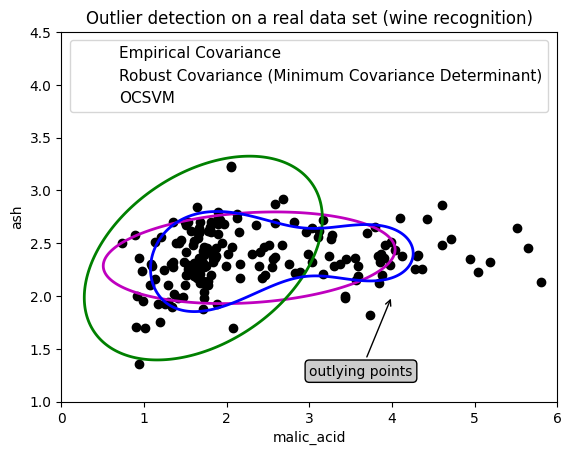

In [21]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine
# Define "classifiers" to be used
classifiers = {"Empirical Covariance": EllipticEnvelope(support_fraction=1.,
contamination=0.25),"Robust Covariance (Minimum Covariance Determinant)":
EllipticEnvelope(contamination=0.25),"OCSVM": OneClassSVM(nu=0.25,
gamma=0.35)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}
# Get data
X1 = load_wine()['data'][:, [1, 2]] # two clusters
# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
 plt.figure(1)
 clf.fit(X1)
 Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
 Z1 = Z1.reshape(xx1.shape)
 legend1[clf_name] = plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2,
colors=colors[i])
legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())
# Plot the results (= shape of the data points cloud)
plt.figure(1) # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("outlying points", xy=(4, 2),xycoords="data", textcoords="data",
xytext=(3, 1.25), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],legend1_values_list[1].collections[0],
legend1_values_list[2].collections[0]),(legend1_keys_list[0], legend1_keys_list[1],
legend1_keys_list[2]),loc="upper center", prop=matplotlib.font_manager.
FontProperties(size=11))
plt.ylabel("ash")
plt.xlabel("malic_acid")
plt.show()

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




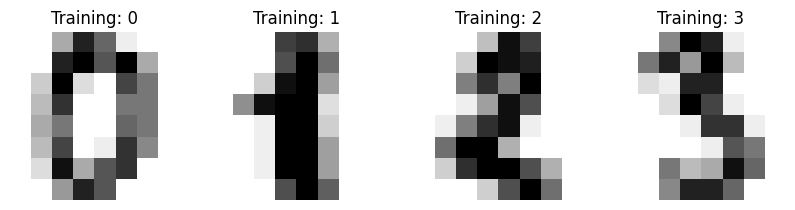

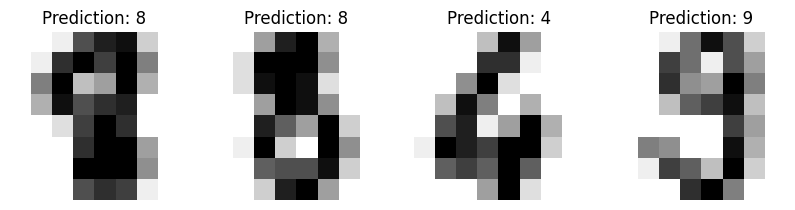

In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
 ax.set_axis_off()
 ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
 ax.set_title('Training: %i' % label)
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split( data, digits.target, test_size=0.5,
shuffle=False)
# Learn the digits on the train subset
clf.fit(X_train, y_train)
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
 ax.set_axis_off()
 image = image.reshape(8, 8)
 ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
 ax.set_title(f'Prediction: {prediction}')
print(f"Classification report for classifier {clf}:\n" f"{metrics.classification_report(y_test,predicted)}\n")
#disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
#disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

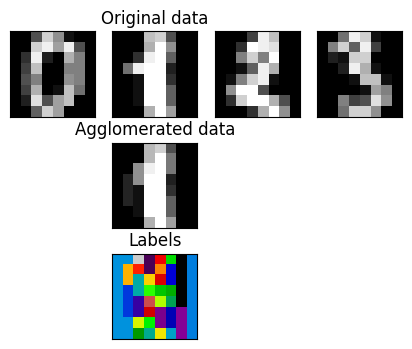

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
n_clusters=32)
agglo.fit(X)
X_reduced = agglo.transform(X)
X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)
plt.figure(1, figsize=(4, 3.5))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
for i in range(4):
 plt.subplot(3, 4, i + 1)
 plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
 plt.xticks(())
 plt.yticks(())
 if i == 1:
  plt.title('Original data')
  plt.subplot(3, 4, 4 + i + 1)
  plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16,interpolation='nearest')
 if i == 1:
   plt.title('Agglomerated data')
   plt.xticks(())
   plt.yticks(())
plt.subplot(3, 4, 10)
plt.imshow(np.reshape(agglo.labels_, images[0].shape),interpolation='nearest',
cmap=plt.cm.nipy_spectral)
plt.xticks(())
plt.yticks(())
plt.title('Labels')
plt.show()


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target
estimators = [('k_means_iris_8', KMeans(n_clusters=8)), ('k_means_iris_3', KMeans(n_clusters=3)), ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
 fig = plt.figure(fignum, figsize=(4, 3))
 ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
 est.fit(X) 
labels = est.labels_
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
  ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() +2, name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-36-28d825facbe8>:19: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-36-28d825facbe8>:20: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-36-28d825facbe8>:21: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be r

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

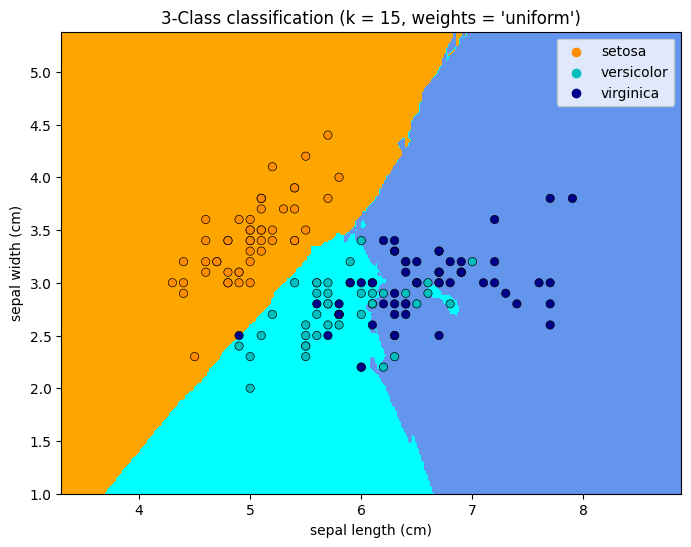

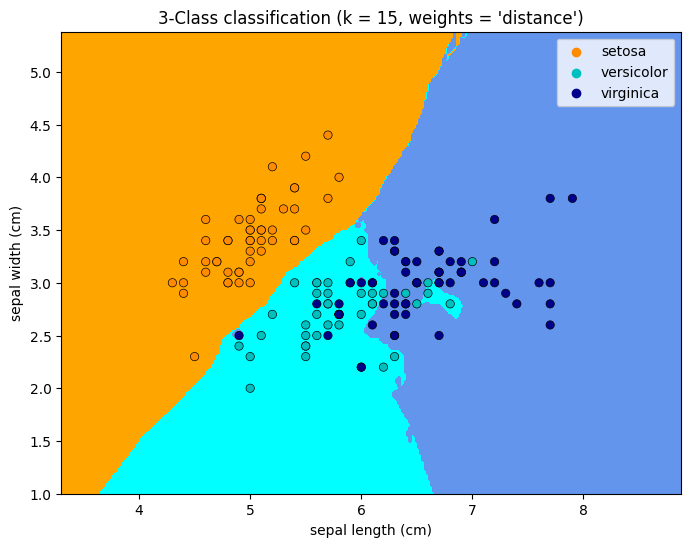

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
n_neighbors = 15
# import some data to play with
iris = datasets.load_iris()
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
h = .02 # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
for weights in ['uniform', 'distance']:
 # we create an instance of Neighbours Classifier and fit the data.
 clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
 clf.fit(X, y)
 # Plot the decision boundary. For that, we will assign a color to each
 # point in the mesh [x_min, x_max]x[y_min, y_max].
 x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 # Put the result into a color plot
 Z = Z.reshape(xx.shape)
 plt.figure(figsize=(8, 6))
 plt.contourf(xx, yy, Z, cmap=cmap_light)
 # Plot also the training points
 sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
 palette=cmap_bold, alpha=1.0, edgecolor="black")
 plt.xlim(xx.min(), xx.max())
 plt.ylim(yy.min(), yy.max())
 plt.title("3-Class classification (k = %i, weights = '%s')"
 % (n_neighbors, weights))
 plt.xlabel(iris.feature_names[0])
 plt.ylabel(iris.feature_names[1])
plt.show()

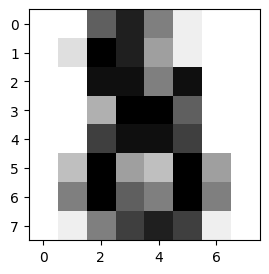

In [38]:
from sklearn import datasets
import matplotlib.pyplot as plt
# Load the digits dataset
digits = datasets.load_digits()
# Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()



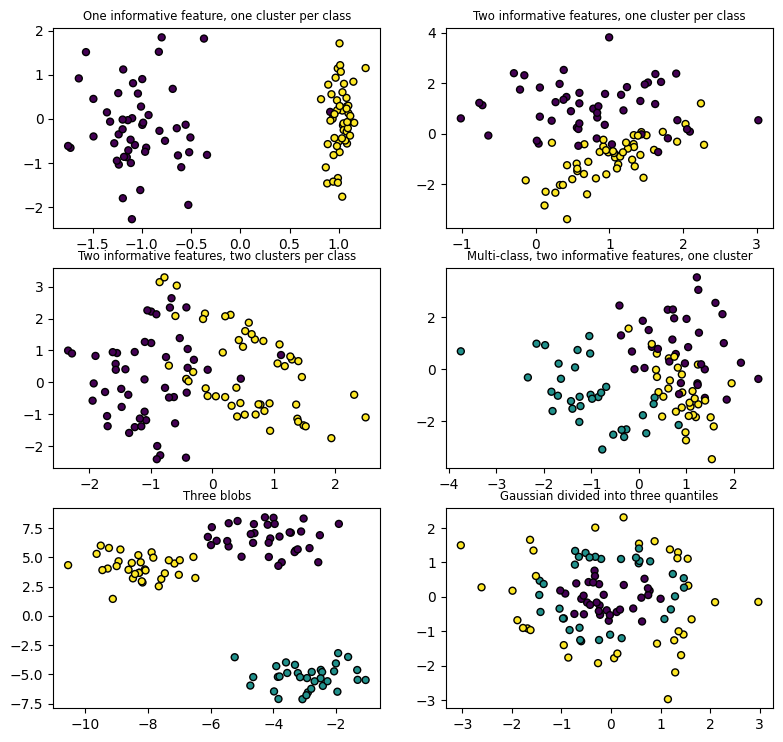

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
 n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.subplot(323)
plt.title("Two informative features, two clusters per class", fontsize='small')
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')
plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
 n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.subplot(325)
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()


Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15521
[fold 2] alpha: 0.07880, score: 0.45192

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


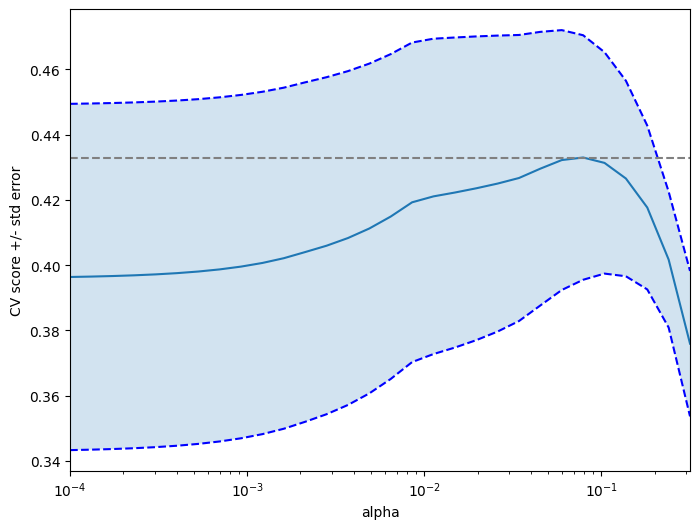

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
#
########################################################################
#####
# Bonus: how much can you trust the selection of alpha?
# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)
print("Answer to the bonus question:", "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
 lasso_cv.fit(X[train], y[train])
 print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}". format(k, lasso_cv.alpha_,
lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")
plt.show()


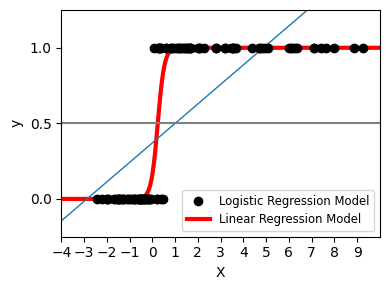

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit
# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)
X = X[:, np.newaxis]
# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)
# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)
loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')
plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'), loc="lower right",
fontsize='small')
plt.tight_layout()
plt.show()


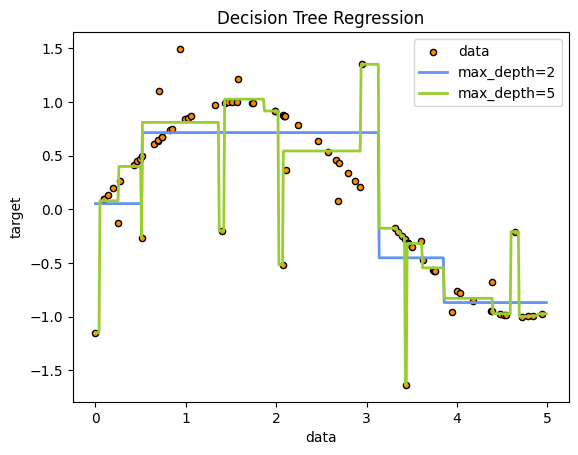

In [42]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

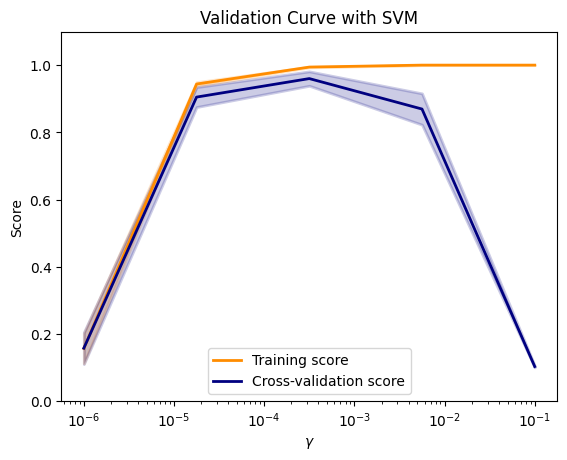

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
X, y = load_digits(return_X_y=True)
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma",
param_range=param_range, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


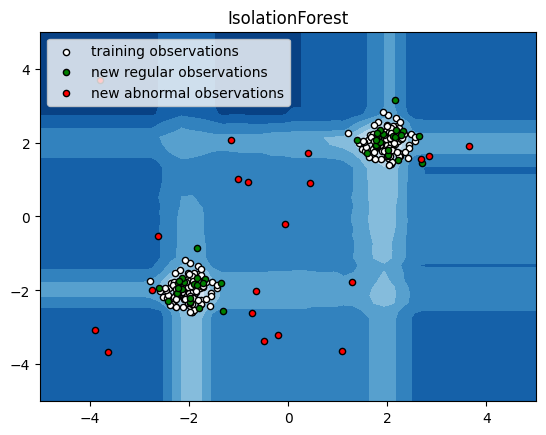

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c], ["training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.show()